In [1]:
%matplotlib inline
import matplotlib.pyplot as plt, seaborn as sn, mpld3
import pandas as pd, os, glob
sn.set_context('notebook')

# ECOREG
## Discharge data processing

The notebook [here](http://nbviewer.jupyter.org/github/JamesSample/ECOREG/blob/master/ecoreg_data_exploration.ipynb) documents my initial exploration of the German discharge data for the ECOREG project. In a meeting on 02/05/2016, it was decided that, initially, Jannicke and Susi will collate and process the ecology data while I calculate IHA parameters for all the German and Norwegian flow sites (see Susi's e-mail from 03/05/2016 at 10:20 for more details). 

This notebook describes the tidying and processing of the discharge data. Note that all the relevant raw data files can be found here:

K:\Prosjekter\Ferskvann\O-13026 ECOREG

I've have also created slightly modified versions of these files on my local drive. These are used as inputs to the code below.

## 1. Sampling times for ecology

For consistency, wherever possible we would like to calculate the IHA parameters based on **5 years** of discharge data prior to the ecological sampling. The IHA methodology generally uses **water years** running from the **start of October to the end of September**, and the water chemistry and ecological surveys in Norway were all undertaken during **September 2013** (see the *Field data* sheet of *ECOREG_WP1_macroinvertebrate data.xlsx* for details). For Norway, it therefore makes sense to calculate the IHA parameters using discharge data for the five year period from **01/10/2008 to 30/09/2013 (water years 2009 to 2013 inclusive)**.

The German sites are a little more complicated. The table below shows the various sampling dates for water chemistry and ecology.

**NB:** I'm guessing that *PB* in the table below relates to benthic algae and *MZB* is the macroinvertebrate data? **Check with Susi**.

In [2]:
# Get sampling/survey times for German sites

ger_eco_xls = r'\\niva-of5\osl-userdata$\JES\Documents\James_Work\Staff\Susi_S\ECOREG\Raw_Data\Germany\sites_and_ecol.xlsx'
ger_eco_df = pd.read_excel(ger_eco_xls, sheetname=' overview (detail)')

# Get columns of interest and rename
df = ger_eco_df[['Gauge', 'date PB', 'date chemistry', 'date MZB']].copy()
df.columns = ['Gauge', 'PB', 'Chem', 'MZB']

# Sort values according to site and date of benthic algae survey
df.sort_values(['Gauge', 'PB'], ascending=True, inplace=True)

df

,Gauge,PB,Chem,MZB
0,Altenburg.1,2009-09-13 15:00:00,2009-08-31 15:00:00,2009-06-02
1,Attendorn,2013-07-02 00:00:00,2013-07-08 00:00:00,2008-06-12
2,Bamenohl,2014-07-01 00:00:00,2014-07-03 00:00:00,2005-06-22
3,Beddelhausen,2010-08-24 15:00:00,2010-08-15 15:00:00,2006-07-17
4,Boerlinghausen,2013-07-22 00:00:00,2013-07-17 00:00:00,2007-04-19
5,Bredelar,2010-07-20 15:00:00,2010-07-07 15:00:00,2007-04-11
6,Bredelar,2013-09-09 00:00:00,2013-09-05 00:00:00,2007-04-11
7,Broel,2006-09-05 15:00:00,2006-09-04 15:00:00,2006-08-21
8,Bueren,2010-09-14 15:00:00,2010-10-17 15:00:00,2008-06-16
9,Bueren,2013-09-16 00:00:00,2013-08-28 00:00:00,2008-06-16


It is clear from this table that surveys at the German sites often take place at different times. In particular, the MZB surveys are frequently several years apart from the closest PB and chemistry sampling data. **Susi and Jannicke will need to decide exactly which data to use here**. In general, the PB and chemistry data seem to be more consistent: unlike MZB, these columns have no missing values and the water sampling and ecological surveys typically take place within the same month. I'm therefore tempted to use these columns to define the IHA discharge time periods.

The above table also shows that some of the sites have been surveyed more than once. To be compatible with the Norwegian data, it makes sense to use data **collected during the autumn** wherever possible. In Excel, I have added columns identifying which surveys look best for each site, as well as giving the preceeding 5 year time period for the discharge data (see *sites_and_ecol.xlsx* on my local drive for details). I have also added a quality control (*QC*) column, which highlights when the only available surveys are widely separated in time. **This all needs checking with Susi and Jannicke**.

Another issue to consider is whether we want use multiple datasets for the same site? For example, the German station **Bueren** has two plausible datasets: 

In [3]:
# Dates for Bueren
df[df['Gauge']=='Bueren']

,Gauge,PB,Chem,MZB
8,Bueren,2010-09-14 15:00:00,2010-10-17 15:00:00,2008-06-16
9,Bueren,2013-09-16 00:00:00,2013-08-28 00:00:00,2008-06-16


The first of these may be the best to use, as the three surveys are closer together in time. The second one could be OK as well, though, and the more data we have in the analysis the better. The main problem with incorporating both is that the overlapping time periods for the flow indicators mean the IHA scores would not be strictly **independent**, which could bias our statistical results. In practice I suspect this effect will be small, but for the moment I've chosen **just one dataset per site** to keep everything "balanced". We can change this later if we want to.

Note that in some cases the choice of which survey dataset to use is not obvious. For example, **Herrntrop**:

In [4]:
# Dates for Herrntrop
df[df['Gauge']=='Herrntrop']

,Gauge,PB,Chem,MZB
15,Herrntrop,2007-07-23 15:00:00,2007-07-16 15:00:00,2007-04-25
16,Herrntrop,2014-09-18 00:00:00,2014-09-10 00:00:00,2007-04-25


In this case we can either have all three surveys taken during the same year, but sampled during the spring and summer, or we can have PB and chemistry samples from the autumn (which is ideal), but an MZB survey that is then more than 7 years "out of date". I'm not sure which is the better option here, but for now I've chosen to **prioritise surveys taken in the same year** (i.e. use the first row from the table above, rather than the second). **Check with Susi and Jannicke**.

Having done this, a summary for the German sites looks like this:

In [5]:
# Get columns of interest and rename
cols = ['Gauge', 'date PB', 'date chemistry', 'date MZB',
        'Use_Data', 'St_Yr_Oct', 'End_Yr_Sept', 'QC']
df = ger_eco_df[cols].copy()
df.columns = ['Gauge', 'PB', 'Chem', 'MZB', 'Use', 'St', 'End', 'QC']

# Extract columns where Use = 1
df = df[df['Use']==1]

# Reformat data for ease of reading
for col in ['PB', 'Chem', 'MZB']:
    df[col] = df[col].apply(lambda x: x.strftime(format='%m-%Y'))
    
# Sort values according to site and date of benthic algae survey
df.sort_values(['Gauge', 'PB'], ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

print 'Total number of German sites with chemistry and ecology data: %s' % len(df)

df

Total number of German sites with chemistry and ecology data: 31


,Gauge,PB,Chem,MZB,Use,St,End,QC
0,Altenburg.1,09-2009,08-2009,06-2009,1,2004,2009,0
1,Attendorn,07-2013,07-2013,06-2008,1,2008,2013,1
2,Bamenohl,07-2014,07-2014,06-2005,1,2009,2014,1
3,Beddelhausen,08-2010,08-2010,07-2006,1,2005,2010,1
4,Boerlinghausen,07-2013,07-2013,04-2007,1,2008,2013,1
5,Bredelar,09-2013,09-2013,04-2007,1,2008,2013,1
6,Broel,09-2006,09-2006,08-2006,1,2001,2006,0
7,Bueren,09-2010,10-2010,06-2008,1,2005,2010,1
8,Geisbach,05-2008,05-2008,04-2008,1,2003,2008,0
9,Gemuend,09-2009,09-2009,05-2009,1,2004,2009,0


This table has a single entry for each of the 31 German sites. However, the MZB surveys for **Bamenohl**, **Boerlinghausen** and **Bredelar** are very old compared to the PB and chemistry data - so old, in fact, that the MZB surveys predate the 5 year window under consideration for the discharge parameters. In addition, the flow regime at Bamenohl is unusual (see the [previous notebook](http://nbviewer.jupyter.org/github/JamesSample/ECOREG/blob/master/ecoreg_data_exploration.ipynb) for more details). It might therefore be a good idea to **remove these sites from further consideration**. This is done below, but can be easily changed again later if desired.

In [6]:
# Sites to remove
drop_sites = ['Bamenohl', 'Boerlinghausen', 'Bredelar']

# Remove
df = df.query('Gauge not in @drop_sites')
df.reset_index(drop=True, inplace=True)

# Update ger_eco_df so we can use this later
ger_eco_df = df
ger_eco_df

,Gauge,PB,Chem,MZB,Use,St,End,QC
0,Altenburg.1,09-2009,08-2009,06-2009,1,2004,2009,0
1,Attendorn,07-2013,07-2013,06-2008,1,2008,2013,1
2,Beddelhausen,08-2010,08-2010,07-2006,1,2005,2010,1
3,Broel,09-2006,09-2006,08-2006,1,2001,2006,0
4,Bueren,09-2010,10-2010,06-2008,1,2005,2010,1
5,Geisbach,05-2008,05-2008,04-2008,1,2003,2008,0
6,Gemuend,09-2009,09-2009,05-2009,1,2004,2009,0
7,Hagen-Eckesey,06-2010,06-2010,06-2007,1,2005,2010,1
8,Hagen-Haspe,10-2007,10-2007,07-2007,1,2002,2007,0
9,Herrntrop,07-2007,07-2007,04-2007,1,2002,2007,0


## 2. Availability of discharge data

The next step is to check whether discharge data are available for the 5 year period of interest at each site. Susi has already confirmed that the monitoring records are complete for all the Norwegian sites, except for **Homstølvatn ndf** (NVE site code 25.6), which only has four years of data (the entire 2009 calendar year is missing). The German data will need more careful checking.

### 2.1. Norwegian flows data

The code below reads Susi's spreadsheet of Norwegian flows and then counts the number of missing values in each series. **NB:** The original file includes lots of analysis at the bottom of the sheet, below the time series themselves. I've copied the sheet and then deleted these calculations, as well as making a few other adjustments to the layout to make the data easier to parse.

In [7]:
# Parse Norwegian flows data
nor_xls = r'\\niva-of5\osl-userdata$\JES\Documents\James_Work\Staff\Susi_S\ECOREG\Raw_Data\Norway\ECOREG discharge complete.xlsx'
nor_df = pd.read_excel(nor_xls, 
                       sheetname='discharge ECOREG',
                       index_col=0)

# Resample to daily
nor_df = nor_df.resample('D').mean()

# Truncate before 01/10/2008 and after 30/09/2013
nor_df = nor_df.truncate(before='2008-10-01', after='2013-09-30')

# Count missing data
nor_df.isnull().sum(axis=0)

S109.2       0
S109.21      0
S109.9       0
S12.137      0
S12.2        0
S12.207      0
S12.7        0
S12.8       23
S16.1        0
S16.128      0
S16.132      0
S16.155      0
S16.193      0
S16.51       0
S19.72       0
S2.129       0
S2.267       0
S2.268       0
S2.303       0
S2.32        0
S2.434       0
S2.439       0
S2.479       0
S2.592       0
S2.611       0
S20.2        0
S21.21       0
S25.6      365
S27.13       0
S27.15       0
S27.16       0
S30.8        0
S35.2        0
S36.31       0
S36.32       0
S50.11       0
S50.13       0
S6.1         0
S6.9         0
S8.2         0
dtype: int64

As expected, the only site with significant missing data is **Homstølvatn ndf** (S25.6). **S12.8** also has some missing values, which are identifed below as all occurring during **September 2013**:

In [8]:
nor_df[nor_df['S12.8'].isnull()]['S12.8']

Date
2013-09-03   NaN
2013-09-04   NaN
2013-09-05   NaN
2013-09-06   NaN
2013-09-07   NaN
2013-09-08   NaN
2013-09-09   NaN
2013-09-10   NaN
2013-09-11   NaN
2013-09-12   NaN
2013-09-13   NaN
2013-09-14   NaN
2013-09-15   NaN
2013-09-16   NaN
2013-09-17   NaN
2013-09-18   NaN
2013-09-19   NaN
2013-09-20   NaN
2013-09-21   NaN
2013-09-22   NaN
2013-09-23   NaN
2013-09-24   NaN
2013-09-27   NaN
Name: S12.8, dtype: float64

Looking at the raw data, this site had a similar period of missing data during August 2013, which Susi patched using **linear interpolation**. For consistency, we can patch the gap here using the same method. Having done this, it's worth plotting the result to make sure it doesn't look too dodgy.

In [9]:
# Interpolate
nor_df['S12.8'].interpolate(method='linear', inplace=True)

# Plot
nor_df['S12.8'].plot()
plt.ylabel('Discharge (m3/s)')
mpld3.display()

Looking at this plot it's clear that May 2013 was pretty exceptional in terms of flows (presumably a big snowmelt event?). Zooming in on August and September 2013, it's also obvious that we're doing **a lot of interpolation based on very little data**. I'll leave this in for now, but I'd be tempted to remove this from the final analysis (or at least test the effects of leaving it in versus taking it out).

In [10]:
# Confirm all missing values have been filled
# (except at S25.6)
nor_df.isnull().sum(axis=0)

S109.2       0
S109.21      0
S109.9       0
S12.137      0
S12.2        0
S12.207      0
S12.7        0
S12.8        0
S16.1        0
S16.128      0
S16.132      0
S16.155      0
S16.193      0
S16.51       0
S19.72       0
S2.129       0
S2.267       0
S2.268       0
S2.303       0
S2.32        0
S2.434       0
S2.439       0
S2.479       0
S2.592       0
S2.611       0
S20.2        0
S21.21       0
S25.6      365
S27.13       0
S27.15       0
S27.16       0
S30.8        0
S35.2        0
S36.31       0
S36.32       0
S50.11       0
S50.13       0
S6.1         0
S6.9         0
S8.2         0
dtype: int64

### 2.2. German flows data

This is a bit more complicated, because we're interested in different time periods for each of the sites. The first step is to match the site names in the German ecology spreadsheet to those in the filenames of the discharge files. This can be done in the same way as in the [previous notebook](http://nbviewer.jupyter.org/github/JamesSample/ECOREG/blob/master/ecoreg_data_exploration.ipynb).

In [11]:
# Input file
in_xlsx = r'\\niva-of5\osl-userdata$\JES\Documents\James_Work\Staff\Susi_S\ECOREG\Raw_Data\Germany\sites_and_ecol.xlsx'

# Read adjusted site names
names_df = pd.read_excel(in_xlsx, sheetname='overview')

# Inner join to German sites of interest on site ID
ger_eco_df = pd.merge(names_df, ger_eco_df, how='inner', on='Gauge')
del ger_eco_df['ID_RS']

ger_eco_df

,Gauge,Site,PB,Chem,MZB,Use,St,End,QC
0,Altenburg.1,altenburg,09-2009,08-2009,06-2009,1,2004,2009,0
1,Attendorn,attendorn,07-2013,07-2013,06-2008,1,2008,2013,1
2,Beddelhausen,beddelhausen,08-2010,08-2010,07-2006,1,2005,2010,1
3,Broel,broel,09-2006,09-2006,08-2006,1,2001,2006,0
4,Bueren,bueren,09-2010,10-2010,06-2008,1,2005,2010,1
5,Geisbach,geisbach,05-2008,05-2008,04-2008,1,2003,2008,0
6,Gemuend,gemuend,09-2009,09-2009,05-2009,1,2004,2009,0
7,Hagen-Eckesey,hagen-eckesey,06-2010,06-2010,06-2007,1,2005,2010,1
8,Hagen-Haspe,hagen-haspe,10-2007,10-2007,07-2007,1,2002,2007,0
9,Herrntrop,herrntrop,07-2007,07-2007,04-2007,1,2002,2007,0


We can now read the flows data for the sites in this table, using some slightly modified code from the [previous notebook](http://nbviewer.jupyter.org/github/JamesSample/ECOREG/blob/master/ecoreg_data_exploration.ipynb).

In [12]:
# Define function to perform parsing and resampling

def read_resample_flows(file_name, 
                        site_name,
                        skiprows=11,
                        sep=';',
                        decimal=',',
                        index_col=False,
                        dt_format='%d.%m.%Y %H:%M:%S',
                        freq='M'):
    """ Reads flows data and resamples to the specified frequency.
    
    Args:
        file_name  File to parse
        site_name  Name of site
        skiprows   Number of rows to skip at start
        sep        Column separator
        decimal    Decimal separator
        dt_format  String specifying date format
        freq       Resampling frequency. 'D'=daily; 'M'=monthly; 'A'=Annual
    
    Returns:
        Data frame.
    """
    df = pd.read_csv(file_name, 
                     skiprows=skiprows,
                     header=None,
                     names=['Date_Time', 'Q_m3/s'],
                     index_col=False,
                     sep=sep,
                     decimal=decimal) 
    
    # Parse dates
    df.index = pd.to_datetime(df['Date_Time'], format=dt_format)
    del df['Date_Time']
    
    # Resample
    df = df.resample(freq).mean()
    df.reset_index(inplace=True)
    
    # Add site name as extra column
    df['Site'] = site_name
    df = df[['Site', 'Date_Time', 'Q_m3/s']]
    
    return df

In [13]:
# Process German flows data

###############################################################################
# User input
in_fold = r'\\niva-of5\osl-userdata$\JES\Documents\James_Work\Staff\Susi_S\ECOREG\Raw_Data\Germany'

# Frequency for resampling
freq = 'D'
###############################################################################
  
# Get list of flow files to process
search_path = os.path.join(in_fold, 'Flows', '*')
file_list = glob.glob(search_path)

# Read files
df_list = []
for file_name in file_list:
    # Get site name
    site_name = os.path.split(file_name)[1].split('_')[0]
    
    # Decide whether we need to process this site
    if site_name in ger_eco_df['Site'].values:
    
        # Process differently according to file extension and file formatting
        if site_name == 'hagen-eckesey':
            # This site has a different date format to the other CSV files
            df = read_resample_flows(file_name,
                                     site_name,
                                     skiprows=11,
                                     sep=';',
                                     decimal='.',
                                     dt_format='%d.%m.%Y %H:%M',
                                     freq=freq)        
            df_list.append(df)

        elif file_name[-3:] == 'csv':
            # The rest of the CSV files are consistent
            df = read_resample_flows(file_name,
                                     site_name,
                                     skiprows=11,
                                     sep=';',
                                     decimal=',',
                                     dt_format='%d.%m.%Y %H:%M:%S',
                                     freq=freq)        
            df_list.append(df)

        elif file_name[-3:] == 'zrx':
            # The ZRX files are also consistent
            df = read_resample_flows(file_name,
                                     site_name,
                                     skiprows=5,
                                     sep=' ',
                                     decimal='.',
                                     dt_format='%Y%m%d%H%M%S',
                                     freq=freq)        
            df_list.append(df)

        else:
            raise ValueError('Unexpected file types found in flows data folder.')

# Concatenate results
ger_df = pd.concat(df_list, axis=0)

# Pivot
ger_df = ger_df.pivot(index='Date_Time', columns='Site', values='Q_m3/s')

ger_df.head()

Site,altenburg,attendorn,beddelhausen,broel,bueren,geisbach,gemuend,hagen-eckesey,hagen-haspe,herrntrop,...,oberagger,opladen,rebbelroth,rueblinghausen,stephansohl,walkmuehle,weidenau,weidenau2,weine,welda
Date_Time,,,,,,,,,,,,,,,,,,,,,
2002-11-01,26.871875,12.376842,18.268708,3.672760,0.969760,0.415208,4.621177,8.041885,2.431885,1.921260,...,0.290875,18.727771,1.718737,2.086000,1.908448,0.494516,3.243656,3.235000,1.692729,3.491375
2002-11-02,23.022760,12.930208,16.494115,9.018885,1.489625,2.006896,11.703562,17.236573,6.462062,2.376573,...,0.891073,31.387135,6.230521,5.112292,4.790135,0.496000,5.062771,7.806500,2.939740,4.934354
2002-11-03,25.203240,19.130208,28.141208,14.343844,1.991990,2.754521,16.447729,19.804417,6.961010,2.508802,...,1.120167,33.298771,7.345625,6.892604,5.405156,0.499000,6.586396,9.629219,3.665646,6.419531
2002-11-04,24.294562,27.472917,31.574656,14.155792,2.095510,1.763750,13.846292,19.969396,6.824437,2.881615,...,1.021458,30.684490,6.595417,7.198438,5.168510,1.040302,7.885073,9.769125,3.546250,6.536563
2002-11-05,23.682260,24.883333,28.632313,9.719073,1.887323,1.209469,11.142406,16.712292,6.078385,2.869292,...,0.676135,25.387385,4.415521,5.395000,3.741135,1.440000,6.802365,7.782625,2.976948,5.927667


We can now look at the 5 year period of interest for each of these sites, to get a feel for how much missing data we will have to deal with.

In [14]:
# Get a list of the German sites of interest
sites = ger_eco_df['Site'].values

# Loop over sites
nan_dict = {'nan_count':[]}
for site in sites:
    # Get start year and end year for this site
    st_yr, end_yr = ger_eco_df[ger_eco_df['Site']==site][['St', 'End']].values.flatten()
    
    # Get series and trunctae at specified dates
    ts = ger_df[site].truncate(before='%s-10-01' % st_yr, after='%s-09-30' % end_yr)
    
    # Count missing values
    nan_cnt = ts.isnull().sum(axis=0)
    nan_dict['nan_count'].append(nan_cnt)

nan_df = pd.DataFrame(data=nan_dict, index=sites)

nan_df

,nan_count
altenburg,0
attendorn,0
beddelhausen,0
broel,0
bueren,0
geisbach,0
gemuend,0
hagen-eckesey,0
hagen-haspe,0
herrntrop,0


So, the only German site with missing data in the periods of interest is **Meschede 3**. Let's plot this to see whether the gap represents a single large chunk, or lots of small periods.

In [15]:
# Get start year and end year for this site
st_yr, end_yr = ger_eco_df[ger_eco_df['Site']=='meschede3'][['St', 'End']].values.flatten()
print st_yr, end_yr

# Get series and trunctae at specified dates
ts = ger_df['meschede3'].truncate(before='%s-10-01' % st_yr, after='%s-09-30' % end_yr)

# Plot
ts.plot()
mpld3.display()

2007 2012


The first thing to note about this series is that it looks unnatural - either there are problems with the flow gauging here or this is a heavily modified flow regime. **It might be worth checking the other series to identify these kinds of patterns?**

Regarding missing data, it appears there are a few small data gaps in the middle of the series, but most of the NaNs are concentrated at the end, between July and September 2012. It is therefore worth applying **linear interpolation** to fill the small data gaps, but there's nothing we can sensibly do about the large gap at the end of the series.

In [16]:
# Get start time of big data gap at the end of the series
gap_st = ger_df['meschede3'].last_valid_index()

# Interpolate
ger_df['meschede3'][:gap_st] = ger_df['meschede3'][:gap_st].interpolate(method='linear')

# Get series and trunctae at specified dates
ts = ger_df['meschede3'].truncate(before='%s-10-01' % st_yr, after='%s-09-30' % end_yr)

print ts.isnull().sum(axis=0)

82


The interpolation algorithm has filled-in values for just three time steps - there are still 82 missing values left at the end of the series.

### 2.3. Summary of discharge data availability

 * Overall, there are **28 German sites** and **40 Norwegain sites** for which we have broadly compatible flow, chemistry and ecology data. <br><br>
 
 * For the 5 year period prior to ecological surveying and water chemistry sampling, we have complete daily discharge records for **66 of the 68 sites**. <br><br>
 
 * At **Homstølvatn ndf** (site 25.6) in Norway, data are missing for the whole of 2009. This will make it difficult to estimate the IHA parameters for the 2009 and 2010 water years, but we can still estimate values based on water years **2011 to 2013 inclusive**. <br><br>
 
 * At site **Meschede 3** in Germany, data are missing from July to September 2012. This will make it difficult to estimate the IHA parameters for the 2012 water year, but we can still calculate values based on water years **2008 to 2011 inclusive**.
 
## 3. Calculation of the IHA parameters

The following code is based on work in the [previous notebook](http://nbviewer.jupyter.org/github/JamesSample/ECOREG/blob/master/ecoreg_data_exploration.ipynb) and uses [R's IHA package](http://deq2.bse.vt.edu/sifnwiki/index.php/R_iha) to calculate the IHA parameters for each time series. We start by defining a fucntion to perform the calculation, linking Python to R.

In [17]:
def process_iha(df):
    """ Processes the first five groups of IHA indicators.
    
    Args:
        df  Pandas data frame with DAILY resolution consisting
            of a single column entitled 'site_name' and a date-time
            index.
    
    Returns:
        Pandas data frame of IHA parameters calculated from the
        IHA R package.
    """
    # Set up connection to R. This all seems unnecessarily complicated!
    import rpy2.interactive as r
    import rpy2.interactive.packages
    from rpy2.robjects.packages import importr
    import pandas.rpy.common as com
    from rpy2.robjects import pandas2ri
    pandas2ri.activate()
    
    # Circular mean function from scipy (see above)
    from scipy.stats import circmean

    # Load necessary R packages
    importr('zoo', lib_loc="//niva-of5/osl-userdata$/JES/Documents/R/win-library/3.2")   
    importr('IHA', lib_loc="//niva-of5/osl-userdata$/JES/Documents/R/win-library/3.2")
    
    # Import R packages into interactive session
    zoo = r.packages.importr('zoo')
    iha = r.packages.importr('IHA')
    
    # Get path to package methods
    rlib = r.packages.packages

    # Convert df to 2 columns ['Dates', 'Flows']
    df2 = df.reset_index()

    # Convert Pandas df to R 
    ts = rlib.zoo.read_zoo(df2, format="%Y-%m-%d")
    
    # Processing for Group 1
    # Calculate group 1 stats.
    rg1 = rlib.IHA.group1(ts)

    # Convert back to Python
    grp1 = com.convert_robj(rg1)

    # Get stats
    grp1 = grp1.describe().T

    # Coefficient of dispersion
    grp1['CoD'] = (grp1['75%'] - grp1['25%']) / grp1['50%']

    # Format grp 1 df
    grp1.index.name = 'Indicator'
    grp1.reset_index(inplace=True)
    grp1['Group'] = 1
    grp1.index = [grp1['Group'], grp1['Indicator']]
    grp1 = grp1[['50%', 'CoD']]
    
    # Processing for Group 2
    # Calculate group 2 stats.
    rg2 = rlib.IHA.group2(ts)

    # Convert back to Python
    grp2 = com.convert_robj(rg2)

    # Get stats
    grp2 = grp2.describe().T

    # Coefficient of dispersion
    grp2['CoD'] = (grp2['75%'] - grp2['25%']) / grp2['50%']

    # Format grp 2 df
    grp2.index.name = 'Indicator'
    grp2.reset_index(inplace=True)
    grp2['Group'] = 2
    grp2 = grp2[grp2['Indicator'] != 'year']
    grp2.index = [grp2['Group'], grp2['Indicator']]
    grp2 = grp2[['50%', 'CoD']]

    # Processing for Group 3
    # Calculate group 3 stats.
    rg3 = rlib.IHA.group3(ts)

    # Convert back to Python
    grp3 = com.convert_robj(rg3)

    # Get stats using circular mean and assuming 366 days per year (as in IHA)
    c_av = circmean(grp3, high=366, low=0, axis=0)
    
    # We won't include a CoD for this stat.
    # Build df to store this info
    grp3 = pd.DataFrame(data=[c_av, [pd.np.nan, pd.np.nan]], 
                        columns=['Min', 'Max'],
                        index=['50%', 'CoD']).T

    # Format grp 2 df
    grp3.index.name = 'Indicator'
    grp3.reset_index(inplace=True)
    grp3['Group'] = 3
    grp3.index = [grp3['Group'], grp3['Indicator']]
    grp3 = grp3[['50%', 'CoD']]

    # Processing for Group 4
    # Calculate group 4 stats.
    rg4 = rlib.IHA.group4(ts)

    # Convert back to Python
    grp4 = com.convert_robj(rg4)

    # Get stats
    grp4 = grp4.describe().T

    # Coefficient of dispersion
    grp4['CoD'] = (grp4['75%'] - grp4['25%']) / grp4['50%']

    # Format grp 4 df
    grp4.index.name = 'Indicator'
    grp4.reset_index(inplace=True)
    grp4['Group'] = 4
    grp4.index = [grp4['Group'], grp4['Indicator']]
    grp4 = grp4[['50%', 'CoD']]  

    # Processing for Group 5
    # Calculate group 5 stats.
    rg5 = rlib.IHA.group5(ts)

    # Convert back to Python
    grp5 = com.convert_robj(rg5)

    # Get stats
    grp5 = grp5.describe().T

    # Coefficient of dispersion
    grp5['CoD'] = (grp5['75%'] - grp5['25%']) / grp5['50%']

    # Format grp 4 df
    grp5.index.name = 'Indicator'
    grp5.reset_index(inplace=True)
    grp5['Group'] = 5
    grp5.index = [grp5['Group'], grp5['Indicator']]
    grp5 = grp5[['50%', 'CoD']]  

    # Combine results
    iha_res = pd.concat([grp1, grp2, grp3, grp4, grp5], axis=0)
    
    # Rename 50% col (because not all values are actually medians)
    # Also add heirarchical index for site_name
    iha_res.columns = [[df.columns[0], df.columns[0]],['Cent_Est', 'CoD']]
   
    return iha_res

Now we can loop over the flows data for each site in turn.

In [18]:
-

Processing sites for Norway...
    S109.2.
    S109.21.
    S109.9.
    S12.137.
    S12.2.
    S12.207.
    S12.7.
    S12.8.
    S16.1.
    S16.128.
    S16.132.
    S16.155.
    S16.193.
    S16.51.
    S19.72.
    S2.129.
    S2.267.
    S2.268.
    S2.303.
    S2.32.
    S2.434.
    S2.439.
    S2.479.
    S2.592.
    S2.611.
    S20.2.
    S21.21.
    S25.6.
    S27.13.
    S27.15.
    S27.16.
    S30.8.
    S35.2.
    S36.31.
    S36.32.
    S50.11.
    S50.13.
    S6.1.
    S6.9.
    S8.2.
Processing sites for Germany...
    altenburg.
    attendorn.
    beddelhausen.
    broel.
    bueren.
    geisbach.
    gemuend.
    hagen-eckesey.
    hagen-haspe.
    herrntrop.
    kornelimuenster.
    lohmar.
    meschede.
    meschede3.
    morsbach.
    nespen.
    nichtinghausen.
    niederschelden2.
    oberagger.
    opladen.
    rebbelroth.
    rueblinghausen.
    stephansohl.
    walkmuehle.
    weidenau.
    weidenau2.
    weine.
    welda.


C:\Data\64_Bit_WinPython\python-2.7.10.amd64\lib\site-packages\ipykernel\__main__.py:17: FutureWarning: The pandas.rpy module is deprecated and will be removed in a future version. We refer to external packages like rpy2. 
See here for a guide on how to port your code to rpy2: http://pandas.pydata.org/pandas-docs/stable/r_interface.html


Indicator,October,November,December,January,February,March,April,May,June,July,...,Base index,Min,Max,Low pulse number,Low pulse length,High pulse number,High pulse length,Rise rate,Fall rate,Reversals
S109.2,14.26635,7.82072,5.65310,3.75705,3.413695,3.88870,10.041685,42.91239,77.470025,53.62394,...,0.133080,70.662255,165.119321,2.0,50.5,5.0,4.5,1.594280,-0.83494,120.0
S109.21,2.09570,1.49478,1.04839,0.68383,0.554850,0.48290,0.837725,4.11195,6.458115,5.98216,...,0.124058,59.735249,148.590160,4.0,4.5,10.0,9.5,0.163395,-0.09456,132.0
S109.9,7.32098,3.54306,2.10483,1.20394,1.055655,0.96242,2.914485,23.93414,49.664980,40.18960,...,0.054133,77.480295,165.119321,2.0,62.0,5.0,5.0,0.813320,-0.48615,110.0
S12.137,19.76105,17.96722,18.15758,17.08776,16.724945,14.62534,11.076525,20.43738,33.069680,20.13873,...,0.242911,99.844788,147.180742,21.0,2.0,13.0,3.0,1.061500,-1.10101,175.0
S12.2,13.75660,11.66225,6.28353,4.17638,3.795560,3.50146,13.490250,45.67725,27.517540,15.75041,...,0.131590,84.142633,164.304139,2.0,55.5,7.0,10.0,1.337410,-0.66441,97.0


The above tables contains the 33 IHA parameters for the 68 sites under consideration.

## 4. Basic data exploration

Before linking the IHA flow parameters to any other data, it's worth trying a few basic plots to see if these numbers make sense.

 * **To do:** Process one of the sites manually using Excel and R to check that the output is the same as from my code.

### 4.1. Seasonality

To begin with, let's see if there are any obvious differences in seasonality between Germany and Norway.

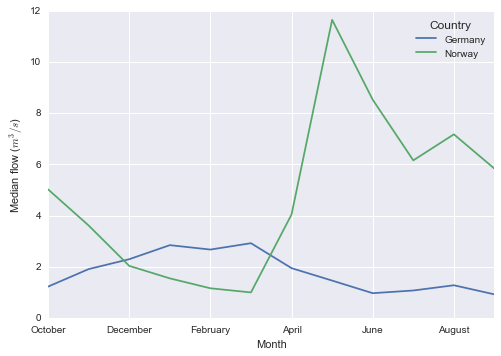

In [19]:
df = iha_df.copy()

# Add column specifying country
df['Country'] = df.index.map(lambda x: 'Norway' if x[0]=='S' else 'Germany')

# Extract just monthly medians
months = ['October', 'November', 'December', 'January', 'February',
          'March', 'April', 'May', 'June', 'July', 'August', 'September']
mon_df = df[months+['Country',]]

# Get the median for each country in each month
meds = mon_df.groupby('Country').median().T

# Plot
meds.plot()
plt.xlabel('Month')
plt.ylabel('Median flow ($m^3/s$)')

There's a pretty big contrast here. Perhaps unsurprisingly, the Norwegian sites typically have a huge meltwater pulse during the spring, and flows then decline steadily throughout the summer and autumn to a minimum at the end of the winter. In contrast, the German sites are characterised by much lower variability overall, and by flows at their highest during the winter and their lowest in the summer. This seems sensible.

We can also get a feel for the variability between sites by creating boxplots for each month. Note that I've **log-transformed** the data here as otherwise the Norwegian snowmelt pulses completely dominate the plot.

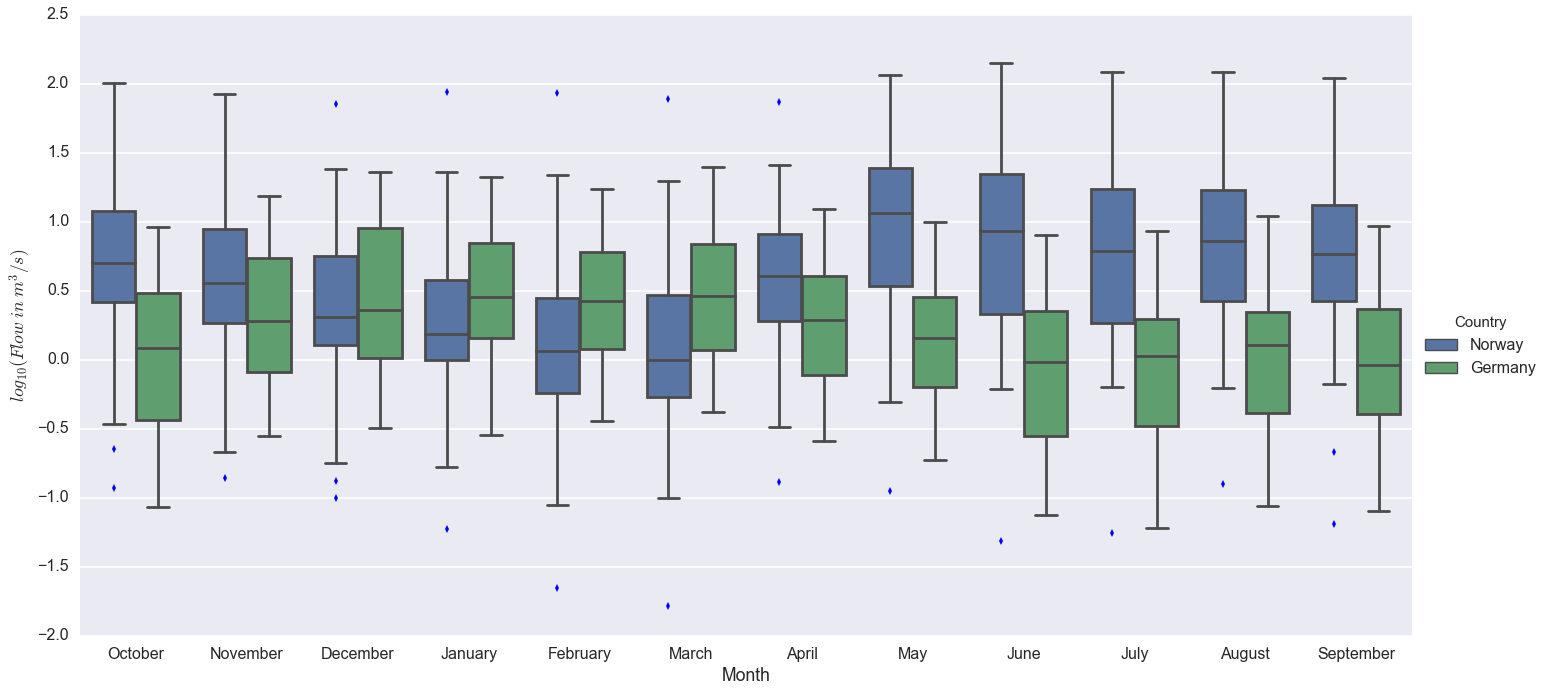

In [20]:
import numpy as np

# Restructure df for use with 'factorplot'
mon_df = pd.melt(mon_df, id_vars=['Country'], value_vars=months, value_name='Flow')

# Log-transform flows
mon_df['Flow'] = np.log10(mon_df['Flow'])

# Plot
with sn.plotting_context('poster'):
    g = sn.factorplot('Indicator', 'Flow', 'Country', data=mon_df, kind='box', size=10, aspect=2)
    g.set_axis_labels('Month', '$log_{10}(Flow \; in \; m^3/s)$')
    plt.show()

### 4.2. Julian day of min and max flow

Based on the plots above, we might also expect the IHA Group 3 parameters (describing the timing of minimum and maximum flows) to be distinct between Norway and Germany.

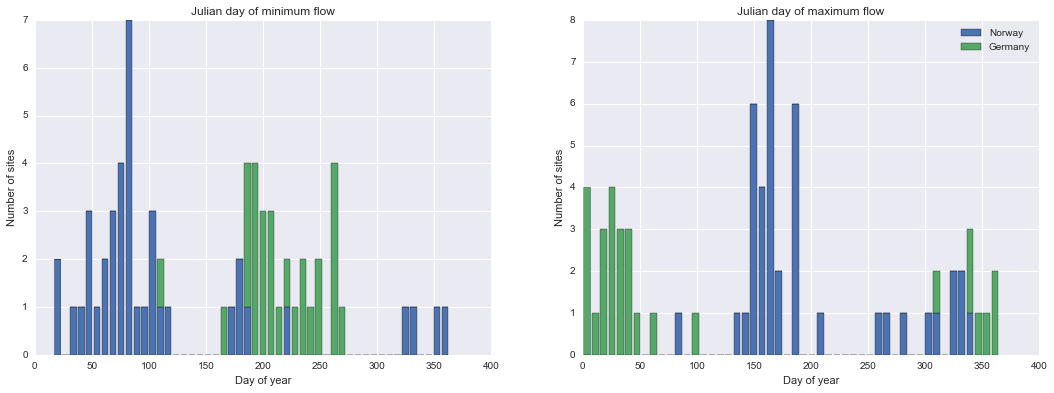

In [21]:
# Get data of interest
cols = ['Min', 'Max', 'Country']
grp3_df = df[cols]

# Plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,6))

nor_min = grp3_df[grp3_df['Country']=='Norway']['Min']
nor_max = grp3_df[grp3_df['Country']=='Norway']['Max']
ger_min = grp3_df[grp3_df['Country']=='Germany']['Min']
ger_max = grp3_df[grp3_df['Country']=='Germany']['Max']

# Mins
axes[0].hist([nor_min, ger_min], 50, 
             stacked=True, normed=False, 
             label=['Norway', 'Germany'])
axes[0].set_title('Julian day of minimum flow')
axes[0].set_xlabel('Day of year')
axes[0].set_ylabel('Number of sites')

# Maxes
axes[1].hist([nor_max, ger_max], 50, 
             stacked=True, normed=False, 
             label=['Norway', 'Germany'])
axes[1].set_title('Julian day of maximum flow')
axes[1].set_xlabel('Day of year')
axes[1].set_ylabel('Number of sites')

plt.legend()
plt.show()

These histograms are clearly **multimodal** and consistent with the seasonality plots above: in Norway, the vast majority of sites have their minimum flows during the winter, from around Julian day 330 to Julian day 100 (roughly December to March); in Germany, minima usually occur between Julian days 175 and 275 (roughly July to September). For maxima, the opposite is true: in Norway most maximum flows occur between Julian days 150 and 175 (roughly June), whereas in Germany the maxima are typicaly between days 350 and 50 (mid-December to late February).

### 4.3. Principal component analysis

Now that the Norwegian data have been incorporated, it could be interesting to repeat the PCA analysis from the [previous notebook](http://nbviewer.jupyter.org/github/JamesSample/ECOREG/blob/master/ecoreg_data_exploration.ipynb) to see whether the Norwegian and German sites are **distinguishable within the IHA parameter space**. 

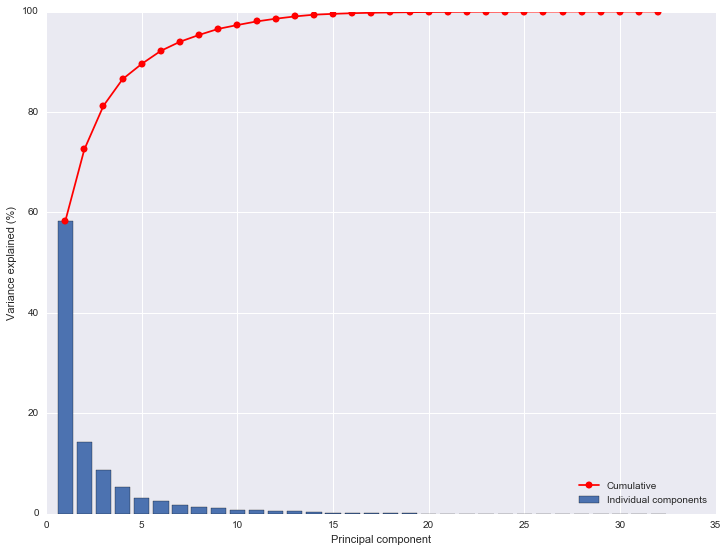

Variance explained by first 5 PCs (%):

[ 58.20556793  14.3399942    8.69155264   5.30551162   3.03892779]

Total: 89.58%


In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Delete the "Zero flows days" indicator, as it's always 0
del iha_df['Zero flow days']

# Standardise the feature data
feat_std = StandardScaler().fit_transform(iha_df)

# Setup PCA. Initially, choose to keep ALL components
pca = PCA()

# Fit model
pca.fit(feat_std)

# Get explained variances (in %)
var_exp = 100*pca.explained_variance_ratio_
cum_exp = np.cumsum(var_exp)

# Plot
fig = plt.figure(figsize=(12, 9))
plt.bar(range(1, len(var_exp)+1), var_exp, align='center', label='Individual components')
plt.plot(range(1, len(cum_exp)+1), cum_exp, 'r-o', label='Cumulative')
plt.xlabel('Principal component')
plt.ylabel('Variance explained (%)')
plt.legend(loc='lower right')
plt.show()

print 'Variance explained by first 5 PCs (%):\n'
print var_exp[:5]
print '\nTotal: %.2f%%' % var_exp[:5].sum()

So, the first two PCs explain roughly **72%** of the variance and the first 3 about **80%**. The plot below shows the projection of the data into the space defined by the first 3 PCs. Norwegian sites are **red**; German sites are **blue**.

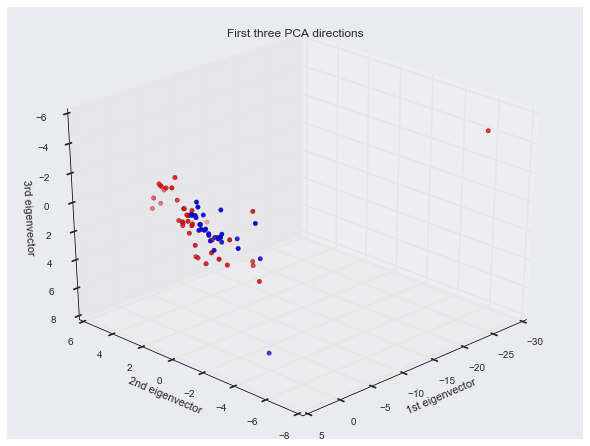

In [23]:
from mpl_toolkits.mplot3d import Axes3D

# Refit the PCA, this time specifying 3 components
# and transforming the result
feat_reduced = PCA(n_components=3).fit_transform(feat_std)

# Plot
colors = {'Norway':'red', 'Germany':'blue'}

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=135)
scat = ax.scatter(feat_reduced[:, 0], feat_reduced[:, 1], feat_reduced[:, 2],
                  c=df['Country'].apply(lambda x: colors[x]))
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")

plt.show()

This suggests the majority of the sites lie approximately on a plane embedded in the space defined by the first three PCs. The main exception to this is that one of the Norwegian sites lies well away from all the others. Let's try a projection into 2D as well.

In [24]:
from mpld3 import plugins

# Refit the PCA, this time specifying 2 components
# and transforming the result
feat_reduced = PCA(n_components=2).fit_transform(feat_std)

# Plot
fig, ax = plt.subplots()
scatter = ax.scatter(feat_reduced[:, 0], feat_reduced[:, 1],
                     c=df['Country'].apply(lambda x: colors[x]))
tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=list(iha_df.index))
mpld3.plugins.connect(fig, tooltip)
ax.set_title("First two PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
mpld3.display()

As before, it is possible to identify individual sites by hovering the mouse over points on the figure above. 

Although there is no clear distinction between the German and Norwegian stations, it is notable that all the German sites are associated with negative values of the second PC, whereas most of the Norwegain sites have positive values. In many cases, there is a clear separation in these two dimensions between the Norwegian sites (in red) and the German ones (in blue).

Another point worth noting is that the first PC here is very heavily influenced by a single outlier (Norwegian site S2.611). One drawback of standard PCA is that it is very sensitive to such outliers, and in this case the direction of the first eigenvector looks to be determined largely by this single point. If site S2.611 was removed from the analysis, the first PC would actually have less variance than the second, so this plot could be misleading: given that these points are projections from a 32 dimensional space, it is possible that a different affine transformation could achieve better separation of the other points if S2.611 was removed. Let's test this.

**NB:** It might be worth trying **[Sparse PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.SparsePCA.html)** here. This introduces an **L1 regularisation penalty**, which may make the results more robust to outliers such as S2.611.

In [25]:
# Delete S2.611
df2 = iha_df.copy()
df2 = df2[df2.index != 'S2.611']

# Standardise the feature data
feat_std = StandardScaler().fit_transform(df2)

# Setup PCA. Initially, choose to keep ALL components
pca = PCA()

# Refit the PCA, this time specifying 2 components
# and transforming the result
feat_reduced = PCA(n_components=2).fit_transform(feat_std)

# Plot
fig, ax = plt.subplots()
scatter = ax.scatter(feat_reduced[:, 0], feat_reduced[:, 1],
                     c=df['Country'].apply(lambda x: colors[x]))
tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=list(iha_df.index))
mpld3.plugins.connect(fig, tooltip)
ax.set_title("First two PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
mpld3.display()

This gives us a slightly different view of the data, although the conclusions are largely the same. Many of the Norwegian sites are hydromorphologically distinct from the German ones, to the extent that drawing a single straight line on the plot above would do a fairly good job of separating the points into two classes. There are, however, a handful of Norwegain sites (approximately 8 looking at the plot above) that are essentially indistinguishable from the German ones. A brief exploration of this "confusion" (e.g. comparing the plot above with the histograms showing the Julian day of maximum and minimum flows) suggests that, unfortunately, these points do not have a straightforward explanation in terms of individual IHA parameters. It might be interesting to look at the geographical location of these sites though?